In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import plot_gate_map, plot_circuit_layout
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from qiskit.providers.aer import AerSimulator
sim=AerSimulator()

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
ut_provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [2]:
def make_bell_circuit(alpha, beta):
    qc0 = QuantumCircuit(2,2)
    qc0.x(0)
    qc0.x(1)
    qc0.h(0)
    qc0.cx(0, 1)
    qc0.rz(alpha,1)
    qc0.h(0)
    qc0.h(1)
    qc0.measure([0,1],[0,1])
    
    qc1 = QuantumCircuit(2,2)
    qc1.x(0)
    qc1.x(1)
    qc1.h(0)
    qc1.cx(0, 1)
    qc1.rz(beta,1)
    qc1.h(0)
    qc1.h(1)
    qc1.measure([0,1],[0,1])
    
    qc2 = QuantumCircuit(2,2)
    qc2.x(0)
    qc2.x(1)
    qc2.h(0)
    qc2.cx(0, 1)
    qc2.rz(alpha,0)
    qc2.rz(beta,1)
    qc2.h(0)
    qc2.h(1)
    qc2.measure([0,1],[0,1])
    return [qc0, qc1, qc2]

In [3]:
x = np.linspace(-np.pi / 2, np.pi / 2, 13)
y = np.linspace(-np.pi, np.pi, 13)

In [5]:
shots = 4096
circuits = []

for i in range(13):
    circuits = circuits + make_bell_circuit(x[i], y[i])

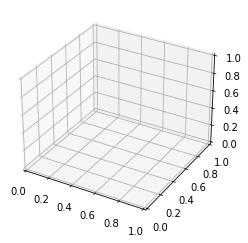

In [4]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection = '3d')

In [1]:
a = [ 3, 5 ]
print(a[0] == a[1])
print(a[0] == a[1] - 2)
True and False
b = [ 4, -0, 2 ]
print(a + b)

False
True
[3, 5, 4, 0, 2]


In [6]:
available_backends = ut_provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational == True)

print(available_backends)

[<IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_sydney') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>, <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-utokyo', group='internal', project=

In [7]:
kawasaki_backend = ut_provider.get_backend("ibm_kawasaki")

In [8]:
kawasaki_circuits = transpile(circuits, backend=kawasaki_backend)
job_kawasaki = kawasaki_backend.run(kawasaki_circuits, shots = shots, job_name = "packed: kawasaki", job_tags = ["bell original inequality", "y=2x", "kawasaki"])
job_monitor(job_kawasaki)

Job Status: job is queued (1)     

KeyboardInterrupt: 

In [ ]:
job_kawasaki_12 = kawasaki_backend.run(kawasaki_circuits, shots = shots, job_name = "packed: kawasaki [ 1, 2 ]", job_tags = ["bell original inequality", "y=2x", "kawasaki"])
job_monitor(job_kawasaki_12)

Job Status: job is queued (1)     

In [9]:
print(job_kawasaki.job_id())

61b706f75d7c536b17b0ad78


In [33]:
bogota_backend = ut_provider.get_backend("ibmq_bogota")

In [17]:
bogota_backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [14]:
bogota_circuits = transpile(circuits, backend=bogota_backend)
job_bogota = bogota_backend.run(bogota_circuits, shots = shots, job_name = "packed: bogota", job_tags = ["bell original inequality", "y=2x", "bogota"])
job_monitor(job_bogota)

Job Status: job is actively running

KeyboardInterrupt: 

In [ ]:
mapped_circuit = transpile(circuits, backend=quito_backend)
job_quito = quito_backend.run(mapped_circuit, shots = shots, job_name = "packed: quito", job_tags = ["bell original inequality", "y=2x", "quito"])
job_monitor(job_quito)

In [16]:
job_monitor(job_bogota)
print(job_bogota.job_id())

Job Status: job has successfully run
61b1a2ae72d4b53c56a7100e


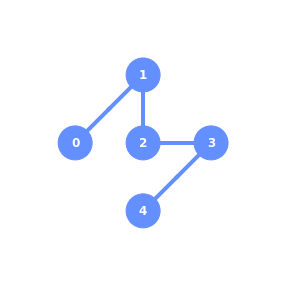

In [26]:
plot_gate_map(bogota_backend)

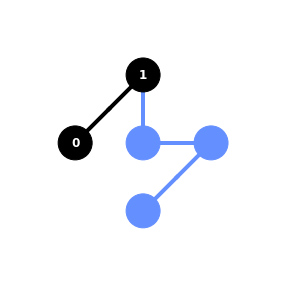

In [25]:
plot_circuit_layout(bogota_circuits[1], bogota_backend)

In [38]:
random_list = [2, -4, 3, 0]
print(random_list)
random_list.reverse()
print(random_list)

[2, -4, 3, 0]
[0, 3, -4, 2]


In [39]:
edge_list = [ [ 0, 1 ], [ 1, 2 ], [ 2, 3 ], [ 3, 4 ] ]
jobs_bogota = []
for edge in edge_list:
    bogota_circuits = transpile(circuits, backend = bogota_backend, initial_layout = edge)
    jobs_bogota.append(bogota_backend.run(bogota_circuits, shots = shots, job_name = "packed: bogota [ " + str(edge[0]) + ", " + str(edge[1]) + " ]", job_tags = ["bell original inequality", "y=2x", "bogota", "forward"]))
    reverse_edge = edge
    reverse_edge.reverse()
    bogota_circuits = transpile(circuits, backend = bogota_backend, initial_layout = reverse_edge)
    jobs_bogota.append(bogota_backend.run(bogota_circuits, shots = shots, job_name = "packed: bogota [ " + str(reverse_edge[0]) + ", " + str(reverse_edge[1]) + " ]", job_tags = ["bell original inequality", "y=2x", "bogota", "backward"]))

In [10]:
def get_bell_value(counts_all):
    z = np.zeros(13)
    for i in range(13):
        counts = counts_all[i * 3 : i * 3 + 3]

        average = [ 0, 0, 0 ]
        for j in range(3):
            for key in counts[j]:
                average[j] += counts[j][key] * (1 if key[0] == key[1] else -1)
            average[j] /= shots

        z[i] = abs(average[0] - average[1]) - average[2]
    
    return z

In [11]:
z_quito = get_bell_value(job_quito.result().get_counts())

Text(0, 0.5, 'Bell values')

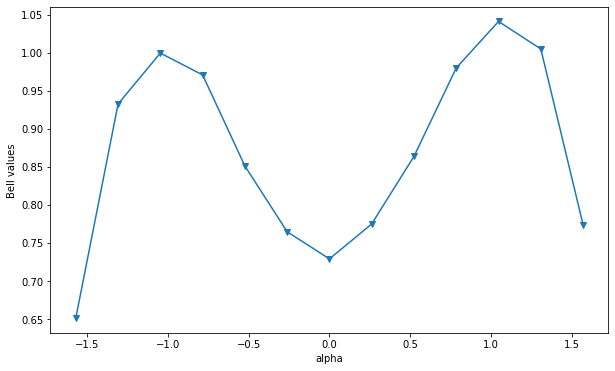

In [12]:
fig4 = plt.figure(figsize = (10, 6))
ax4 = plt.axes()
# ax4.plot(x, z_noiseless, "o-")
ax4.plot(x, z_quito, "v-")
# ax4.plot(x, z_kawasaki, "P-")
ax4.set_xlabel('alpha')
ax4.set_ylabel('Bell value')